(482.8615394718431, 287.3290817496179, 45.86160984308875, 81.07767742278494, 411.97324445935055, 798.2739049380499, 654.1992916918517, 924.630618787141, 955.3087768005571, 610.2656335730891, 687.9466519935202, 469.5382686596899, 832.3647172682101, 666.8583174470764, 837.4560853121394, 858.1354043622027, 349.5251628817457, 59.35115002289148, 456.24403597420826, 602.8462486076219, 20.028816918384276, 372.0799158492433, 140.77238203766603, 791.1686943532753, 180.6250335700942, 548.67041328911, 886.7323892668184, 931.4320800644662, 395.67204180354156, 748.9136160848302, 651.4255311141077, 677.273153312284, 889.1601212748836, 53.53235340315242, 726.0836278123797, 355.89262405372403, 242.8207322360122, 265.2680743981869, 53.554683225973335, 847.9270870594546, 273.6671190307205, 360.96328569038417, 692.6011248747682, 579.9278492532411, 469.2292559487565, 897.9890471219202, 190.1114518075913, 722.3281713799228, 398.390821533117, 802.9819663848581, 230.808178472444, 501.01352665033545, 494.8051

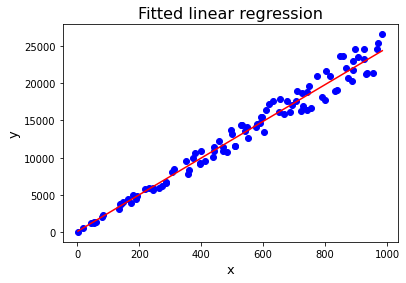

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import random
# let's create a linear function with some error called f
def f(x):
    res = x* 25 + 3
    error = res * random.uniform(-0.12, 0.12) # you can play with the error to see how it affects the result
    return res + error

values = []
# now using f we are going to create 300 values.
for i in range(0, 100):
    x = random.uniform(1, 1000)
    y = f(x)
    values.append((x, y))
    regr = linear_model.LinearRegression()
# split the values into two series instead a list of tuples
x, y = zip(*values)
print(x)
print(y)
max_x = max(x)
min_x = min(x)

# split the values in training and test data.
#x_val=np.array(x[:-20])
#train_data_X=np.matrix(x_val.reshape(len(x_val),1))
train_data_X = list(map(lambda x: [x], list(x[:-20])))
train_data_Y = list(y[:-20])
#x_val=np.array(x[-20:])
#test_data_X=np.matrix(x_val.reshape(len(x_val),1))
test_data_X = list(map(lambda x: [x], list(x[-20:])))
test_data_Y = list(y[-20:])

# feed the linear regression with the train data to obtain a model.
regr.fit(train_data_X, train_data_Y)
# check that the coeffients are the expected ones.
m = regr.coef_[0]
b = regr.intercept_
print(' y = {0} * x + {1}'.format(m, b))

# now we are going to plot the points and the model obtained
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_data_X, test_data_Y))